In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = LinearRegression()
drive.mount('/drive')

Mounted at /drive


In [2]:
hdf = pd.read_csv('/drive/My Drive/Colab Notebooks/SDS_Hackathon_Dataset_30_11_22.csv')
hdf.head()

,Unnamed: 0,Active,Rest,Smoke,Gender,Exercise,Hgt,Wgt
0,0,97.0,78.0,0.0,1.0,1.0,63.0,119.0
1,1,82.0,68.0,1.0,0.0,3.0,70.0,225.0
2,2,88.0,62.0,0.0,0.0,3.0,72.0,175.0
3,3,106.0,74.0,0.0,0.0,3.0,72.0,170.0
4,4,78.0,63.0,0.0,1.0,3.0,67.0,125.0


Heatmap

In [17]:
active_mean = hdf["Active"].mean()
rest_mean = hdf["Rest"].mean()
smoke_mode = hdf["Smoke"].mode()                # mode = 0 i.e. non smokers
gender_mode = hdf["Gender"].mode()              # mode = 0 i.e. men
excercise_mean = hdf["Exercise"].mean()
height_mean = hdf["Hgt"].mean()
weight_mean = hdf["Wgt"].mean()
hdf["Active"].fillna(active_mean, inplace = True)
hdf["Rest"].fillna(rest_mean, inplace = True)
hdf["Smoke"].fillna(0.0, inplace = True)
hdf["Gender"].fillna(0.0, inplace = True)
hdf["Exercise"].fillna(excercise_mean, inplace = True)
hdf["Hgt"].fillna(height_mean, inplace = True)
hdf["Wgt"].fillna(weight_mean, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd74a171f0>,
      dtype=object)

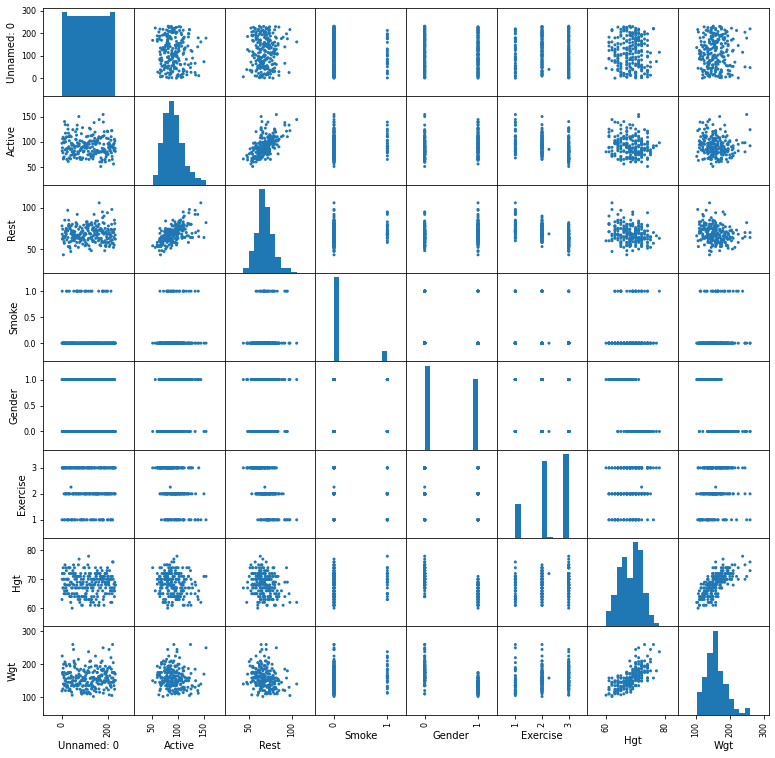

In [ ]:
pd.plotting.scatter_matrix(hdf, alpha = None, diagonal='hist', figsize = (13,13), range_padding = 0.7)

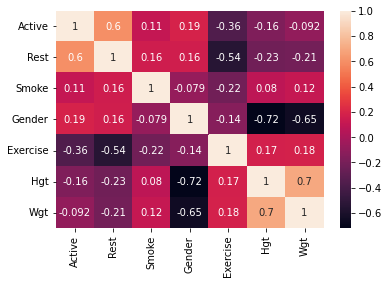

In [ ]:
corr_all_arr = ["Active", "Rest", "Smoke", "Gender", "Exercise", "Hgt", "Wgt"] 
corr_all = hdf[corr_all_arr].corr()
sns.heatmap(corr_all, annot = True)

Coefficient Of Determination

In [ ]:
pearsons_coefficient = np.corrcoef(hdf['Active'], hdf['Rest'])
pearsons_coefficient

array([[1.        , 0.60321035],
       [0.60321035, 1.        ]])

In [ ]:
coeff_det = pearsons_coefficient[0][1]*pearsons_coefficient[0][1]
coeff_det

0.36386272107813167

In [19]:
pearsons_coefficient = np.corrcoef(hdf[corr_all_arr])
pearsons_coefficient

array([[1.        , 0.88984648, 0.94288786, ..., 0.97598375, 0.95245866,
        0.95948726],
       [0.88984648, 1.        , 0.98766601, ..., 0.96746858, 0.98579112,
        0.97861136],
       [0.94288786, 0.98766601, 1.        , ..., 0.99053961, 0.99897133,
        0.99804335],
       ...,
       [0.97598375, 0.96746858, 0.99053961, ..., 1.        , 0.99508694,
        0.99495326],
       [0.95245866, 0.98579112, 0.99897133, ..., 0.99508694, 1.        ,
        0.99877962],
       [0.95948726, 0.97861136, 0.99804335, ..., 0.99495326, 0.99877962,
        1.        ]])

We can see that active and rest, height and wight are correalated.

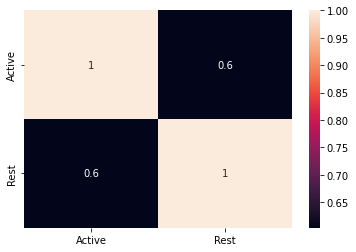

In [20]:
data = ['Active', 'Rest']
correlation = hdf[data].corr()
sns.heatmap(correlation, annot = True)

Text(0, 0.5, 'Rest')

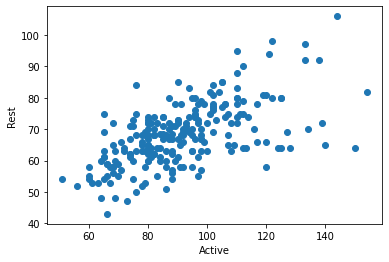

In [21]:
plt.scatter(hdf['Active'], hdf['Rest'])
plt.xlabel('Active')
plt.ylabel('Rest')

Best Fit line

Text(0, 0.5, 'Rest')

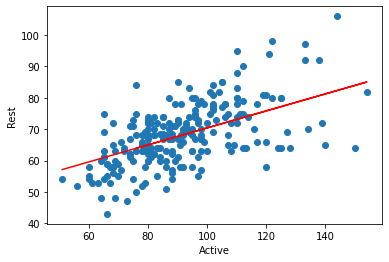

In [22]:
Active_ds = hdf.iloc[:,1:2]
Rest_ds = hdf.iloc[:,2:3]
x_train,x_test,y_train,y_test = train_test_split(Active_ds,Rest_ds,test_size = 0.2, random_state = 2)
model.fit(x_train,y_train)

plt.scatter(hdf['Active'], hdf['Rest'])
plt.plot(x_train,model.predict(x_train), color = 'red')
plt.xlabel('Active')
plt.ylabel('Rest')

In [23]:
prediction = model.predict(x_test)
prediction

array([[73.11812846],
       [70.1391788 ],
       [73.11812846],
       [65.80616112],
       [65.53534752],
       [66.88941554],
       [66.34778833],
       [64.99372031],
       [69.8683652 ],
       [64.99372031],
       [77.99277334],
       [69.05592438],
       [63.91046589],
       [68.78511078],
       [73.38894206],
       [69.59755159],
       [73.11812846],
       [77.18033253],
       [61.47314344],
       [66.07697473],
       [66.61860194],
       [72.03487404],
       [70.95161962],
       [64.99372031],
       [67.16022915],
       [65.53534752],
       [61.74395705],
       [64.99372031],
       [79.34684137],
       [74.20138288],
       [73.65975567],
       [64.4520931 ],
       [70.68080601],
       [62.55639786],
       [72.03487404],
       [64.4520931 ],
       [79.34684137],
       [61.20232984],
       [66.34778833],
       [69.59755159],
       [73.11812846],
       [69.59755159],
       [61.20232984],
       [75.01382369],
       [71.76406043],
       [67

In [24]:
residuals = np.subtract(y_test, prediction)
residuals

,Rest
20,-1.118128
151,-4.139179
30,6.881872
208,-10.806161
54,-3.535348
24,5.110584
207,0.652212
44,-4.993720
10,-12.868365
93,-1.993720


Residual vs Fitted plot

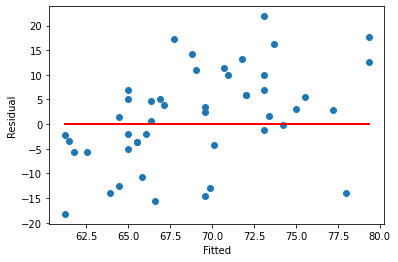

In [25]:
plt.scatter(prediction, residuals)
plt.xlabel('Fitted')
plt.ylabel('Residual')
zeros = np.full((len(prediction),1),0)
plt.plot(prediction,zeros, color = 'red')

Equation of the best fit line

In [26]:
model.intercept_

array([43.32863191])

In [27]:
model.coef_

array([[0.2708136]])

X = Active, Y = Rest

In [28]:
print("Y = ",model.intercept_[0],"* x + ",model.coef_[0][0]) 

Y =  43.32863190822937 * x +  0.27081360497335644
